<a href="https://colab.research.google.com/github/Denis-Yen/DataScience/blob/main/3_Regresi%C3%B3nLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal Simple en Python

### Se usa el paquete statsmodel para regresion lineal o sklearn

In [ ]:
import pandas as pd
import statsmodels.formula.api as smf # libreria para regresión lineal

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Advertising.csv")
data.head()

In [ ]:
lm = smf.ols(formula="Sales~TV", data= data).fit() # El fit sirve para buscar el modelo que mejor se ajusta a los datos
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

El modelo lineal predictivo sería $Sales =7.032594 + 0.047537*TV $




In [ ]:
lm.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [ ]:
lm.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [ ]:
lm.rsquared

0.611875050850071

In [ ]:
lm.rsquared_adj

0.6099148238341623

In [ ]:
lm.summary() # Obtenemos el resumen 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        05:44:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Prediciendo las Ventas con el modelo lineal


In [ ]:
# Truco: Tener una variable en columna de tipo dataframe para predecir 
sales_pred = lm.predict(pd.DataFrame(data["TV"]))
sales_pred

0      17.970775
1       9.147974
2       7.850224
3      14.234395
4      15.627218
         ...    
195     8.848493
196    11.510545
197    15.446579
198    20.513985
199    18.065848
Length: 200, dtype: float64

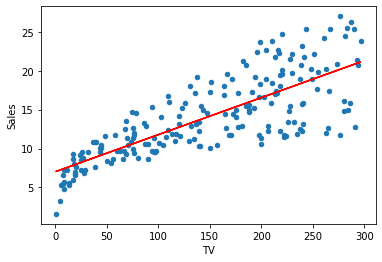

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
data.plot(kind = "scatter", x = "TV", y = "Sales")
plt.plot(pd.DataFrame(data["TV"]), sales_pred, "red", linewidth = 1.5)

In [ ]:
data["Sales_pred"] = 7.032594 + 0.047537*data["TV"]
data.head()

,TV,Radio,Newspaper,Sales,Sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.120148
1,44.5,39.3,45.1,10.4,9.147990,1.571638
2,17.2,45.9,69.3,9.3,7.850230,2.103660
3,151.5,41.3,58.5,18.5,14.234450,18.242722
4,180.8,10.8,58.4,12.9,15.627284,7.401664


In [ ]:
data["RSE"] = (data["Sales"] - data["Sales_pred"])**2
data.head(2)

,TV,Radio,Newspaper,Sales,Sales_pred,RSE
0,230.1,37.8,69.2,22.1,17.970858,17.049816
1,44.5,39.3,45.1,10.4,9.147990,1.567528


In [ ]:
SSD = sum(data["RSE"])
SSD

2102.5305838896525

In [ ]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

3.258656369238098

In [ ]:
sales_mean = np.mean(data["Sales"])
sales_mean

14.022500000000003

In [ ]:
error = RSE/sales_mean *100
error # Existe un 14% de error que no es explicado por el modelo

4.070845395057711

In [ ]:
plt.hist((data["Sales"] - data["Sales_pred"])) # Los errores se distribuyen normalmente con media cero 

# Regresión lineal multiple

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
# Modelo 1 con una sola variable predictora "TV"
lm = smf.ols(formula="Sales~TV", data= data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.47e-42
Time:                        05:47:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm.predict(data["TV"])
sales_pred

In [ ]:
SSD =  sum((data["Sales"]- sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-2))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(2102.530583131351, 3.258656368650462, 0.23238768897489473)

In [ ]:
# Añadimos el newspapper al modelo 2
lm2 = smf.ols(formula="Sales ~ TV + Newspaper",data=data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           3.95e-45
Time:                        06:00:42   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525     10.993      0.000       4.739       6.811
TV             0.0469      0.003     18.173      0.000       0.042       0.052
Newspaper      0.0442      0.010      4.346      0.000       0.024       0.064
==============================================================================
Omnibus:                        0.658   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.720   Jarque-Bera (JB):                0.415
Skew:                          -0.093   Prob(JB):                        0.813
Kurtosis:                       3.122   Cond. No.                         410.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm2.predict(data[["TV", "Newspaper"]])
sales_pred

In [ ]:
# CReamos el RSE
SSD =  sum((data["Sales"]- sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(1918.5618118968266, 3.1207198602528847, 0.2225508903728211)

In [ ]:
# Añadimos Radio al modelo 3
lm3 = smf.ols(formula="Sales ~ TV + Radio",data=data).fit()
lm3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           4.83e-98
Time:                        06:02:37   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sales_pred = lm3.predict(data[["TV", "Radio"]]) # LA Radio Aporta mas información al modelo
sales_pred

In [ ]:
# CReamos el RSE
SSD =  sum((data["Sales"]- sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-3))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(556.9139800676187, 1.6813609125080016, 0.11990450436855063)

In [ ]:
# Agregamos las 3 VAriables predictoras al modelo
lm4 = smf.ols(formula="Sales ~ TV + Radio + Newspaper", data=data).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 16 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        06:07:50   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos que al agregar el newspapaer con 3 variables predictoras el modelo no mejora y tbn se aprecia que dicha variable no es signifcativa, asi que nos deshacemos de dicha predictora. Nos quedamos con el modelo 3, ya que predice mejor

In [ ]:
sales_pred = lm4.predict(data[["TV","Radio","Newspaper"]])
sales_pred

In [ ]:
# Calculamos el RSE
SSD = sum((data["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(data)-4))
error = RSE/np.mean(data["Sales"])
SSD, RSE, error

(556.8252629021872, 1.685510373414744, 0.12020041885646238)

## Problema de la regresion multiple
### Multicolinealidad, las variables predictoras estan correlacionadas entre si.

$VIF = \frac{1}{1 - R^2}$
* Si VIF < 1, Las variables no estan correlacionadas
* Si 1 < VIF <= 5, Las variables  estan moderadamente correlacionadas  (pueden formar parte del modelo)
* Si VIF > 5, Las variables  estan altamente  correlacionadas (deben ser eliminadas)

In [ ]:
data.corr() # Existe un relacion debil positiva entre la radio y el newspaper, se debe eliminar uan de las 2 variables

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
# Newspaper + TV + Radio -> R^2 VIF = 1/(1-R^2)
lm_n = smf.ols(formula="Newspaper ~ TV + Radio", data=data).fit()
r_squared_n = lm_n.rsquared
VIF = 1 /(1-r_squared_n)
VIF
# Radio + Newspaper + TV  -> R^2 VIF = 1/(1-R^2)

1.1451873787239288

In [ ]:
# TV + Newspaper + Radio -> R^2 VIF = 1/(1-R^2)
lm_tv = smf.ols(formula="TV ~ Newspaper + Radio", data=data).fit()
r_squared_tv = lm_tv.rsquared
VIF = 1 /(1-r_squared_tv)
VIF # LA tv no esta correlacionada con ninguna otra variable más

1.00461078493965

In [ ]:
# Radio + Newspaper + TV  -> R^2 VIF = 1/(1-R^2)
lm_radio = smf.ols(formula="Radio ~ TV + Newspaper", data=data).fit()
r_squared_radio = lm_radio.rsquared
VIF = 1 /(1-r_squared_radio)
VIF

1.1449519171055353

Concluimos que el periodico y la radio estan correlacionadas dado que tiene casi el mismo VIF, queda claro que la TV no esta correlacionada con ninguna de ellas. Y nos quedamos con el modelo 3.

# Validación del Modelo

## Dividir la data en Conjunto de entrenamiento y testing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Machine en Python  Udemy/Data/Advertising.csv")
data.head()

In [ ]:
a = np.random.randn(len(data))
check = (a<0.8)
training = data[check]
testing = data[~check]

len(training), len(testing)

(164, 36)

In [ ]:
# Usando el conjunto de training
lm = smf.ols(formula="Sales ~ TV + Radio", data= training).fit()
lm.summary()

In [ ]:
# Validación del modelo con el conjunto de testing
sales_pred = lm.predict(testing)
sales_pred

In [ ]:
# Calculamos la SSD
SSD = sum((testing["Sales"]-sales_pred)**2)
RSE = np.sqrt(SSD/(len(testing)-2-1))
error = RSE/np.mean(testing["Sales"])
SSD, RSE, error

(81.06688738746642, 1.5673456367613174, 0.10122792056585474)

El modelo no tiene overfiting o sobreajuste. ya qu eno varia mucho